# Introduction

The dataset originally has **330 features (columns)** but based on diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions the publisher of that dataset clean **BRFSS** data into a **useable format for machine learning alogrithms**.
__________________________________________________________________________________________________________________________

**Important risk factors for diabetes :**

( blood pressure (high) , cholesterol (high) , smoking , diabetes , obesity , age , sex , race , diet , exercise , alcohol consumption , BMI , Household Income , Marital Status , Sleep , Time since last checkup , Education , Health care coverage , Mental Health )
___________________________________________________________________________________________________________________________

### About Columns :

**Diabetes_binary** : you have diabetes (0,1)

**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

**CholCheck** : Cholesterol check within past five years (0,1)

**BMI** : Body Mass Index (BMI)

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

**Stroke** : (Ever told) you had a stroke. (0,1)

**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

**Fruits** : Consume Fruit 1 or more times per day (0,1)

**Veggies** : Consume Vegetables 1 or more times per day (0,1)

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)

**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)

**Sex** : Indicate sex of respondent (0,1) (Female or Male)

**Age** : Fourteen-level age category (1 ~ 14)

**Education** : What is the highest grade or year of school you completed? (1 ~ 6)

**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

# Import Libraries

_________________________________________________________________________________________________________________________

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
import time
from imblearn.over_sampling import SMOTE
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


________________________________________________________________________________________________________________

# Data Exploring

______________________________________________________________________________________________________________________

In [3]:
Orginal_data = pd.read_csv("/content/drive/MyDrive/dataset.csv" , sep = "," , encoding = 'utf-8')

In [4]:
data = pd.read_csv("/content/drive/MyDrive/dataset.csv" , sep = "," , encoding = 'utf-8')

__________________________________________________________________________________________________________________

## Dataset Report

In [5]:
#profile = ProfileReport(data)

In [6]:
#profile

In [7]:
data.shape

(253680, 22)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [10]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


_____________________________________________________________________________________________________________________________

# Preprocessing

___________________________________________________________________________________________________________________

In [11]:
#Transform the data to integer

In [12]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int)
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

**Check null values**

In [14]:
data.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


**checking unique values in different variables**

In [15]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [16]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [17]:
v_counts(data)

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64
_____________________________________________________________________________
HighBP
0    144851
1    108829
Name: count, dtype: int64
_____________________________________________________________________________
HighChol
0    146089
1    107591
Name: count, dtype: int64
_____________________________________________________________________________
CholCheck
1    244210
0      9470
Name: count, dtype: int64
_____________________________________________________________________________
BMI
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64
_____________________________________________________________________________
Smoker
0    141257
1    112423
Name: count, dtype: int64
_____________________________________________________________________________
Stroke
0    243388
1     10292
Name: count, dtype: int64
__

_______________________________________________________________________________________________________

**Check The Outliers**

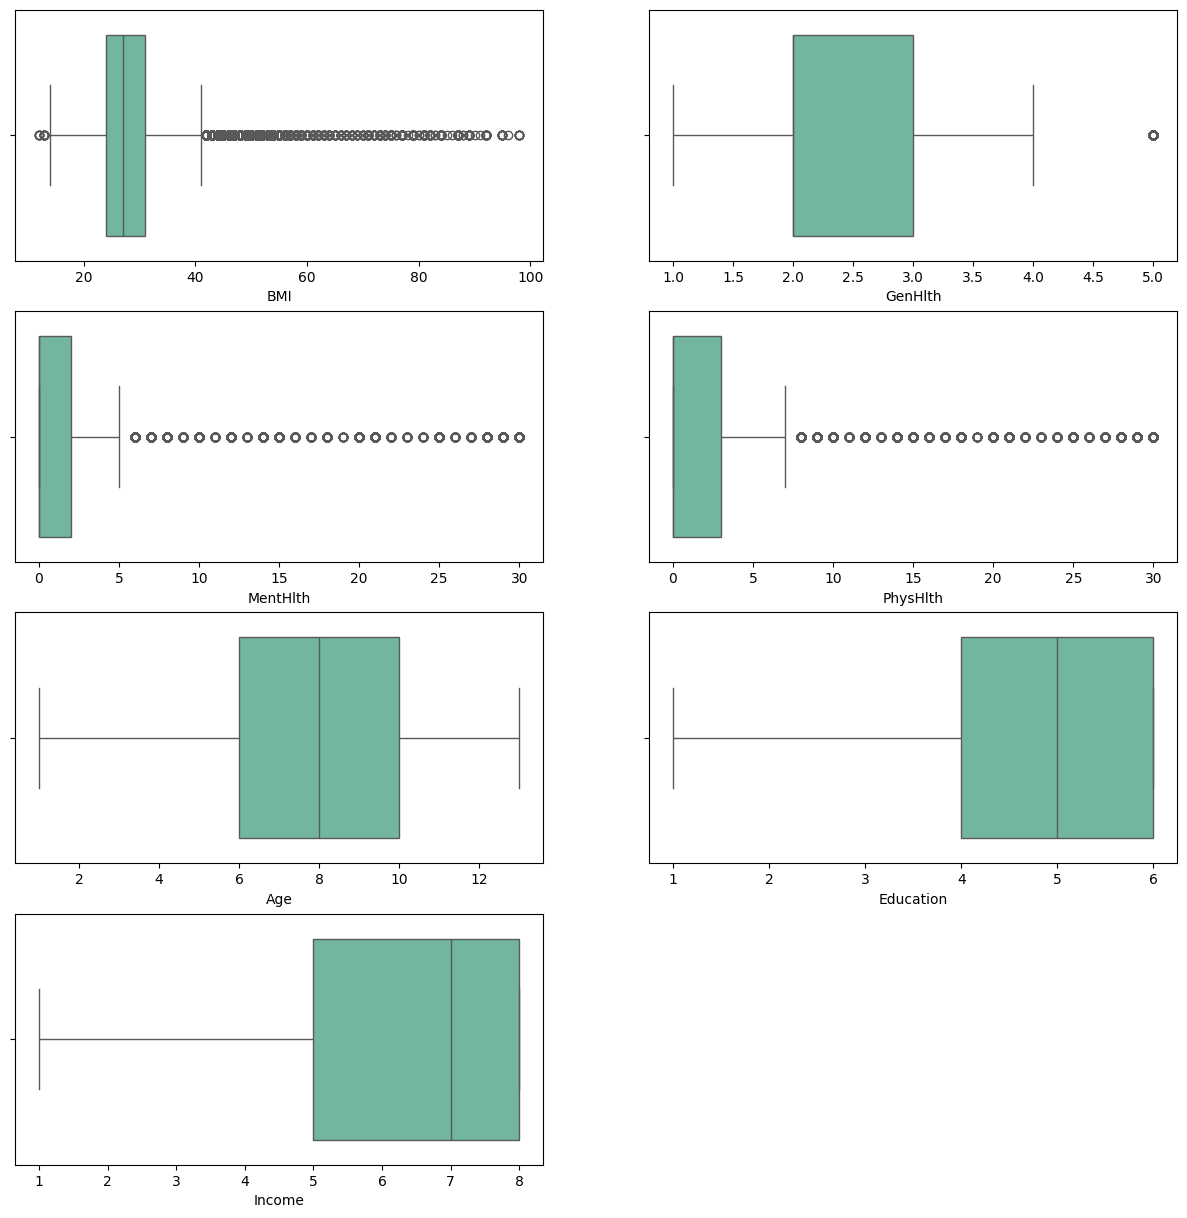

In [18]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.savefig('boxplot.jpg')
plt.show()


there is no outlayers in our data

_____________________________________________________________________________________________________

**Check and drop dublicated data**

In [19]:
data.duplicated().sum()

24206

In [20]:
data.drop_duplicates(inplace = True)

In [21]:
data.duplicated().sum()

0

In [22]:
data.shape

(229474, 22)

_____________________________________________________________________________________________________________________

**Some codes that help us in our EDA**

In [23]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic
#adding new column Diabetes_binary_str

data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"NOn-Diabetic",1:"Diabetic"})

In [24]:
#help us to show the categorical variable
data2 = data.copy()

In [25]:
# That help us to show the relation between features clearly

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

___________________________________________________________________________________________________________________________

# EDA

_____________________________________________________________________________________________________________________

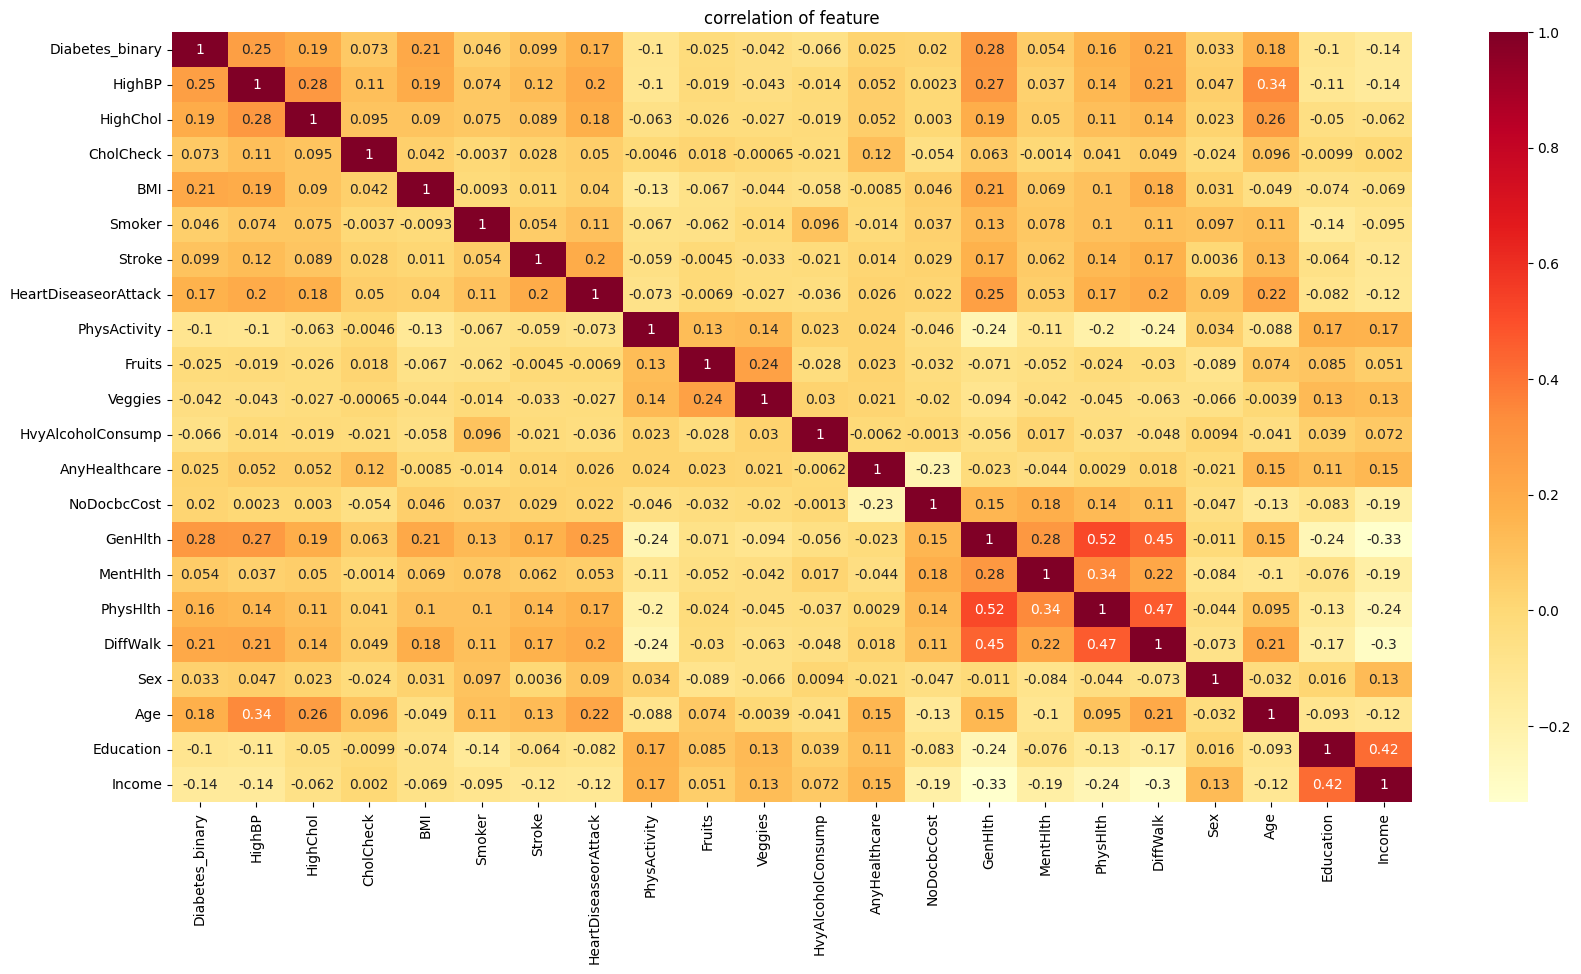

In [26]:
#using heatmap to understand correlation better in dataset data
#Heatmap of correlation

plt.figure(figsize = (20,10))
sns.heatmap(data.drop(columns=['Diabetes_binary_str']).corr(), annot=True, cmap='YlOrRd')
plt.title("correlation of feature")
plt.savefig('pearson.jpg')

Correlation heatmap show relation between columns:

(GenHlth ,PhysHlth ),(PhysHlth , DiffWalk),(GenHlth ,DiffWalk )are highly correleted with each other => **positive relation**


(GenHlth ,Income ) , (DiffWalk , Income) are highly correleted with each other => **Nagative relation**

__________________________________________________________________________________________________________________

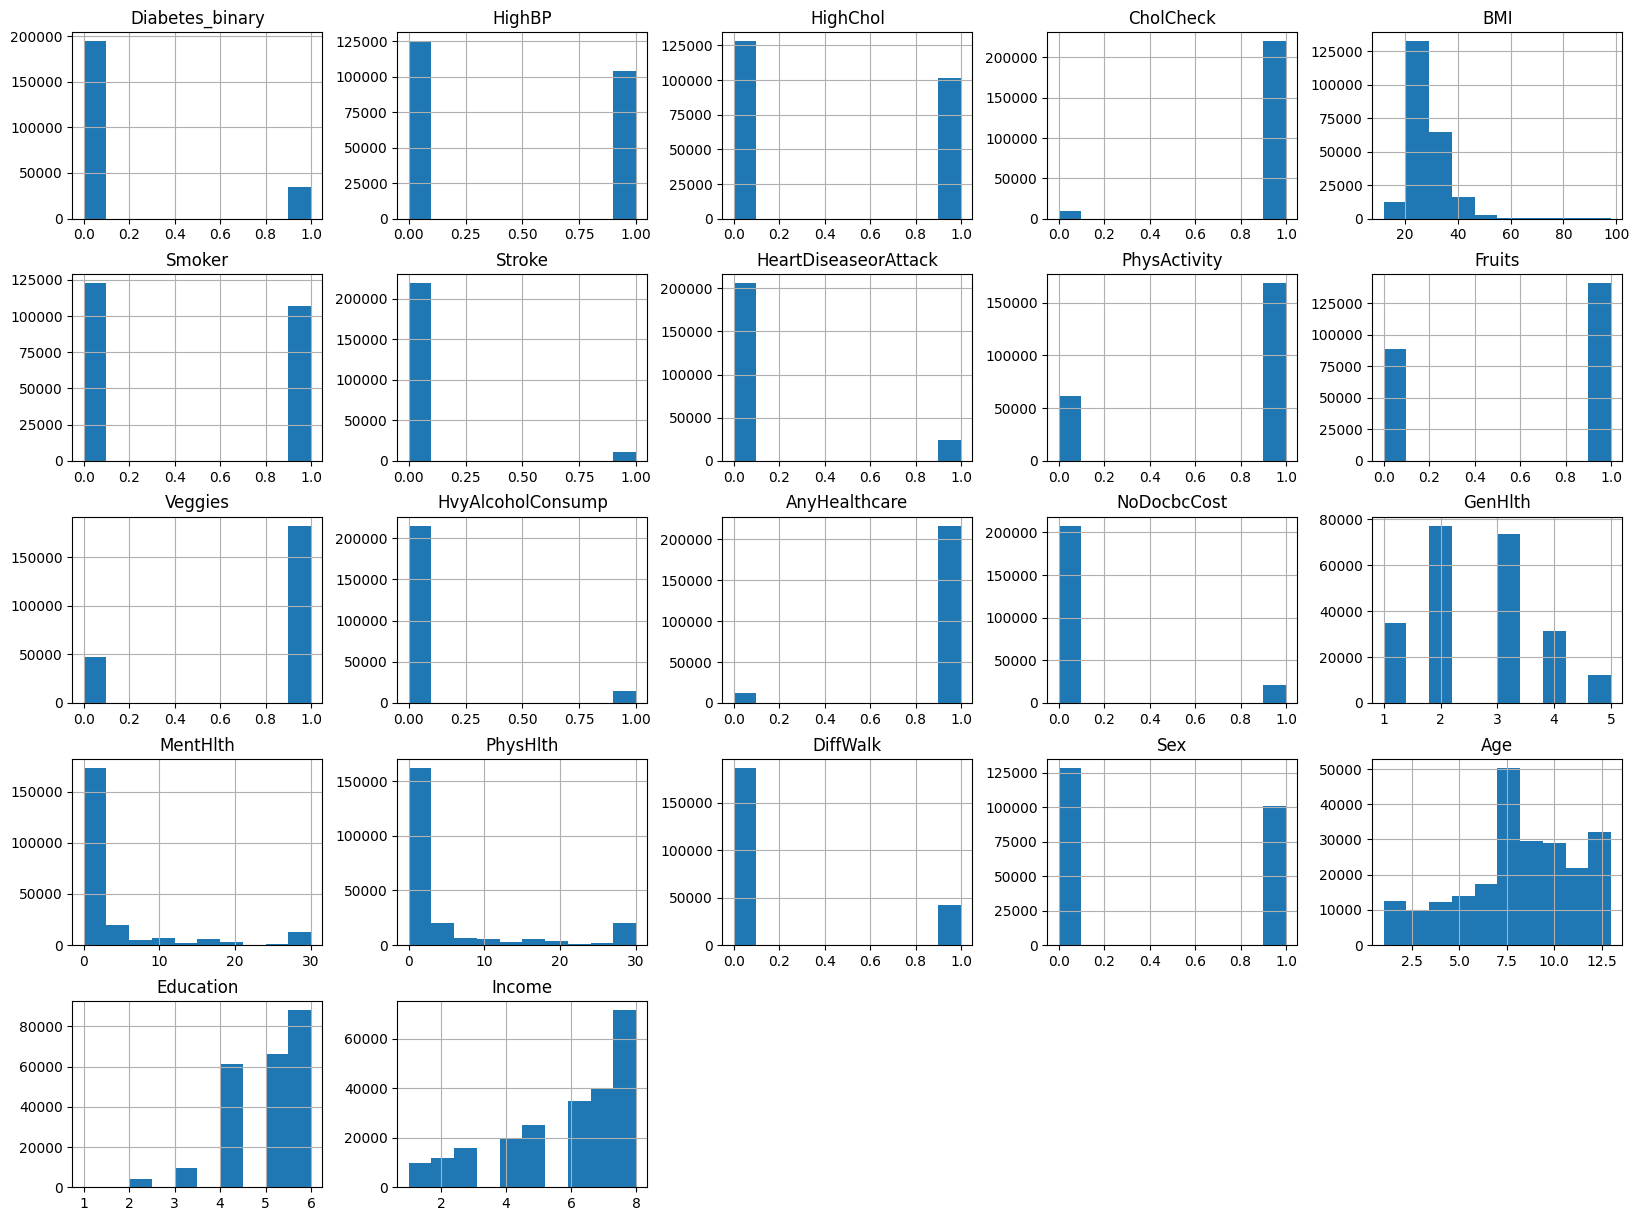

In [27]:
#using histogram to understand dataset data better

data.hist(figsize=(20,15));

____________________________________________________________________________________________________________________

**Visualization Of [Yes - NO] Columns and their relation with the target**

In [28]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [29]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

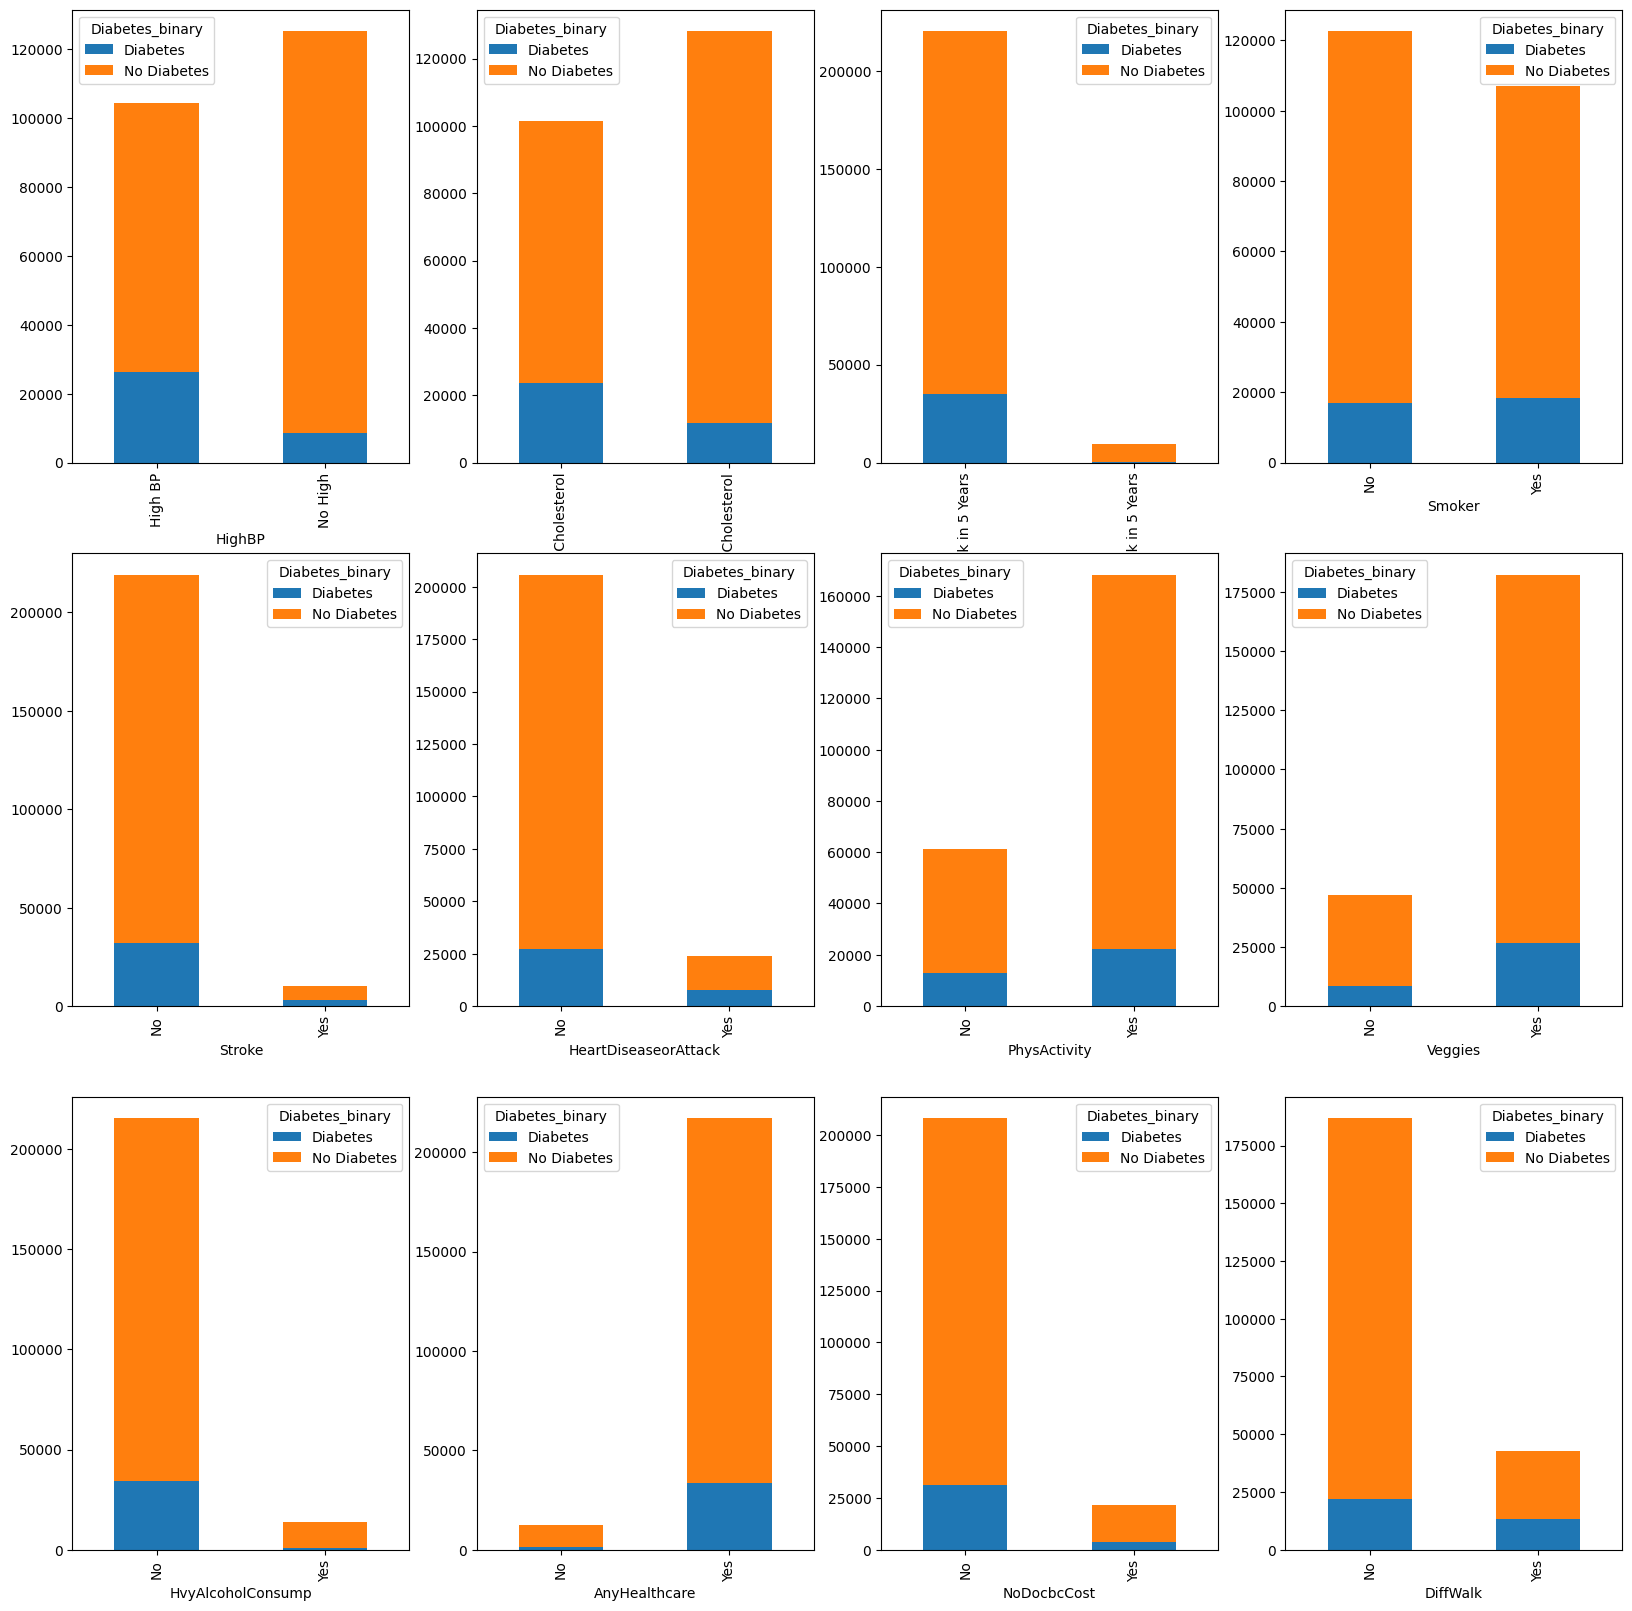

In [30]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])

fig.show()

______________________________________________________________________________________________________________

**Let's view our target values "Daibetes_binary"**

In [31]:
#average of column Daibetes_binary
# 0 for non-Diabetic person and 1 for Diabetic person

data2["Diabetes_binary"].value_counts()

,count
Diabetes_binary,
No Diabetes,194377
Diabetes,35097


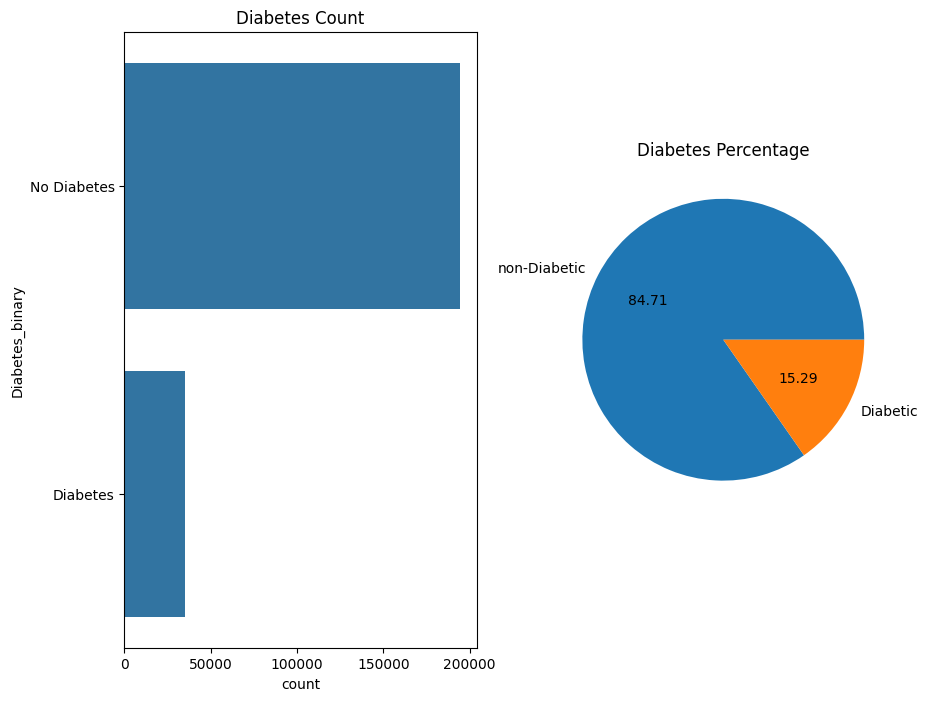

In [32]:
#checking the value count of Diabetes_binary_str by using countplot
figure1, plot1 = plt.subplots(1,2,figsize=(10,8))
sns.countplot(data2['Diabetes_binary'],ax=plot1[0])
plot1[0].set_title('Diabetes Count')


#checking diabetic and non diabetic pepoles average by pie

labels=["non-Diabetic","Diabetic"]
plt.pie(data2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );
plt.title('Diabetes Percentage')
plt.savefig('diabetic_count.jpg')


We can see that healthy people is more than people with diabetes

_____________________________________________________________________________________________________________________

**The feature "Age" and it's relation with the target**

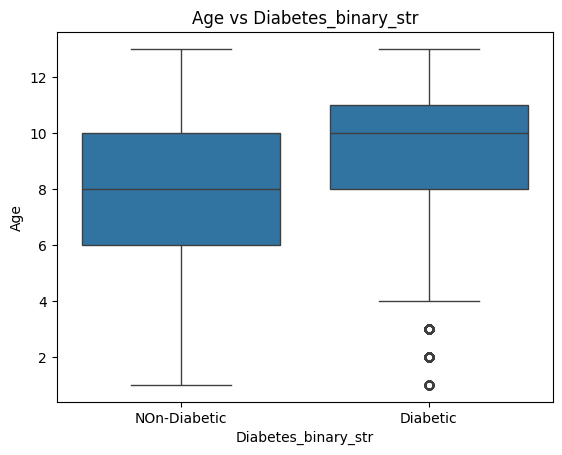

In [33]:
sns.boxplot(x = 'Diabetes_binary_str', y = 'Age', data = data)
plt.title('Age vs Diabetes_binary_str')
plt.show()

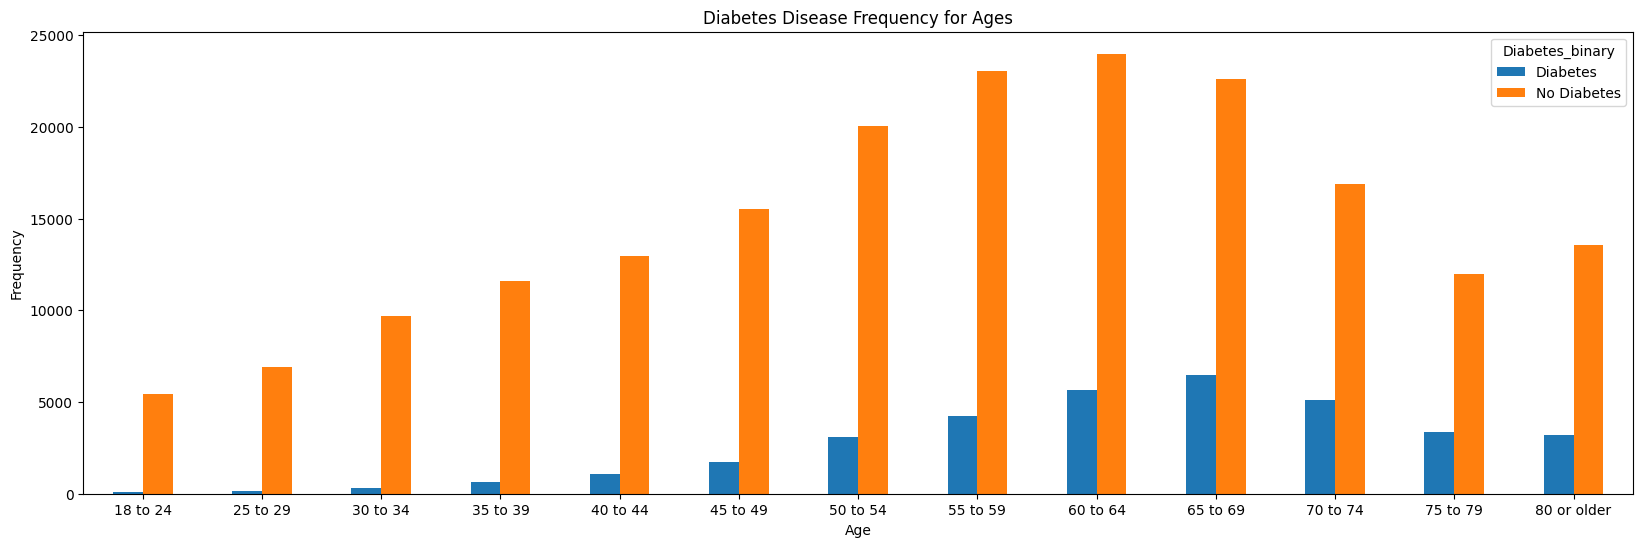

In [34]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.savefig('age_diabetes.jpg')
plt.show()


We know that as the age increases, the chances of diabetes also commonly increases. From above we can say, the median of the age of diabetic people is greater than that of non-diabetic people.

______________________________________________________________________________________________________________________

**The feature "Education" and it's relation with the target**

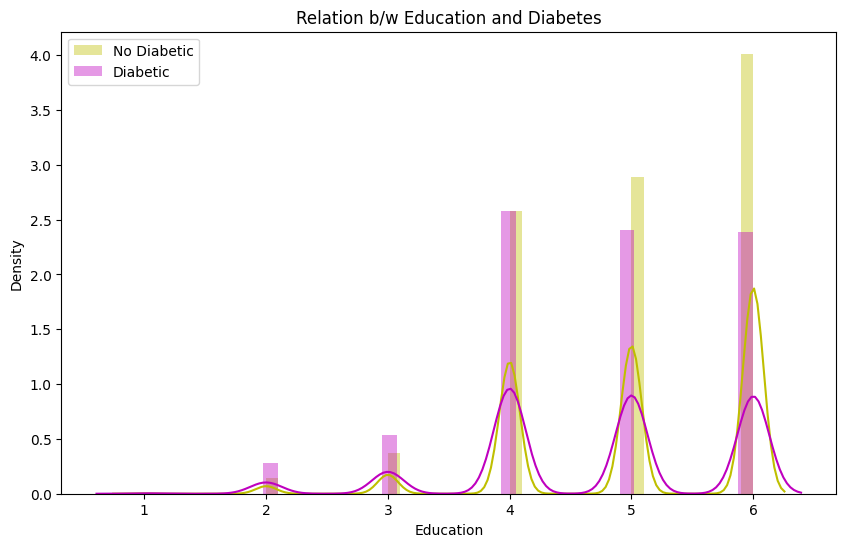

In [35]:
plt.figure(figsize=(10,6))


sns.distplot(data.Education[data.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="m", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()
plt.savefig('edu_dia.jpg')

We can see that most of people have high education and in the high level of education , the healthy people is more than others

_____________________________________________________________________________________________________________________

**The feature "income" and it's relation with the target**

<Figure size 2000x1000 with 0 Axes>

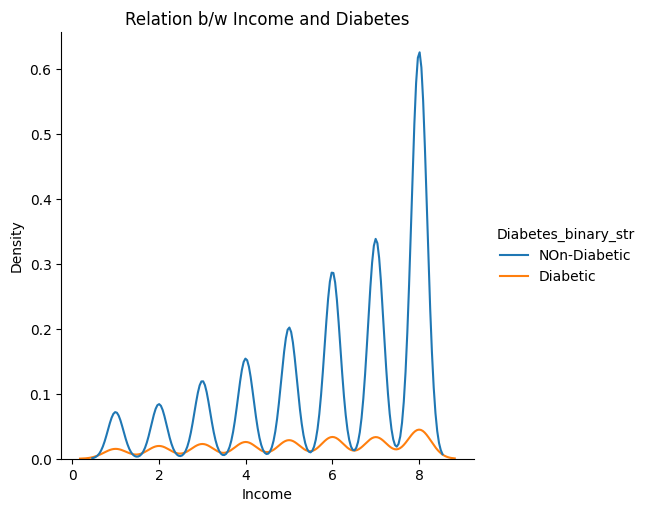

In [36]:
plt.figure(figsize=(20,10))

sns.displot(data=data, x="Income", hue="Diabetes_binary_str", kind="kde")
plt.title("Relation b/w Income and Diabetes")
plt.savefig('Income_Diabetes.jpg',bbox_inches='tight')
plt.show()

We can see that most of people have high income and in the high level of income , the healthy people is more than others

______________________________________________________________________________________________________________________

**The feature "BMI" and it's relation with the target**

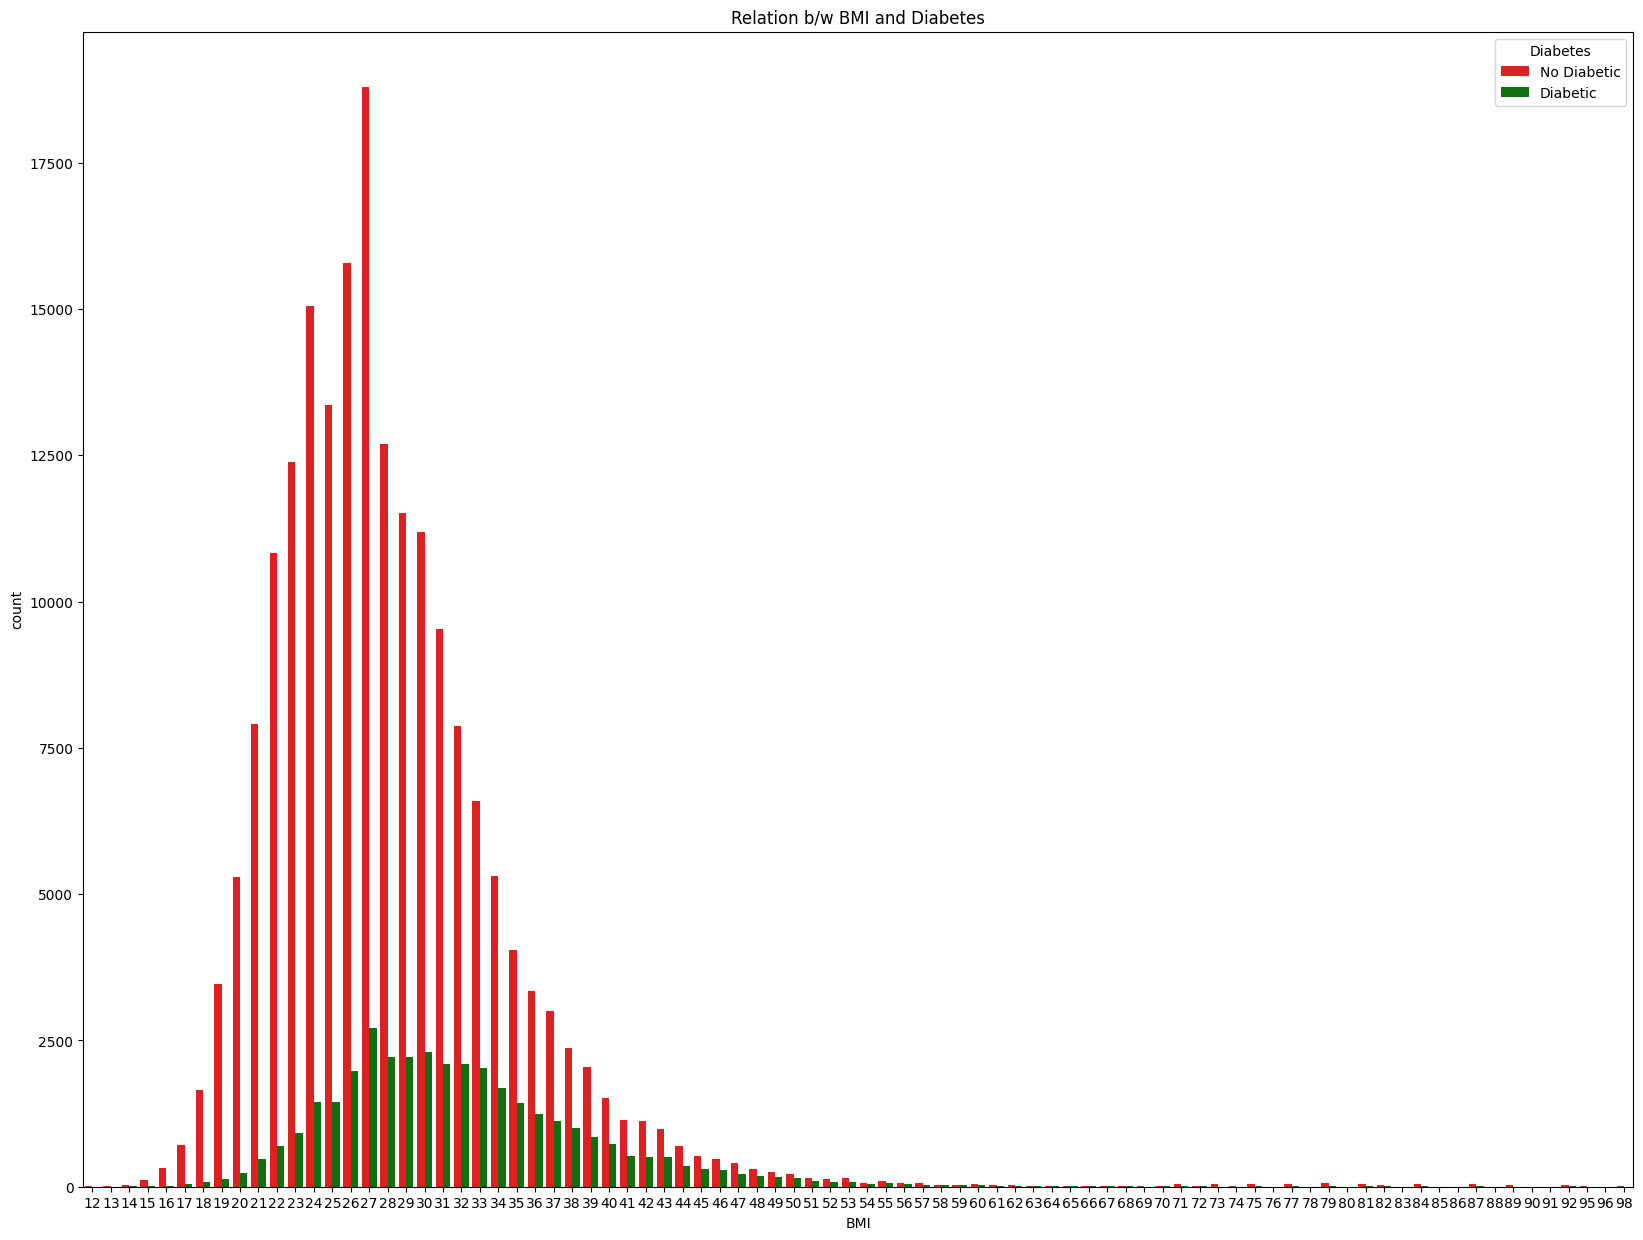

In [37]:
#count plot to see numbers of Diabetic and non Diabetic patient of Group two BMI

plt.figure(figsize=(20, 15))

sns.countplot(x="BMI", data=data, hue="Diabetes_binary", palette=["r", "g"])  # Single countplot with hue

plt.title("Relation b/w BMI and Diabetes")
plt.legend(title="Diabetes", labels=["No Diabetic", "Diabetic"])
plt.savefig('BMI_diabetes.jpg',bbox_inches='tight')
plt.show()


As we can see people range between 24-33 BMI have more likely to have Diabetic.

________________________________________________________________________________________________________________________

**The feature "MentHlth" and it's relation with the target**

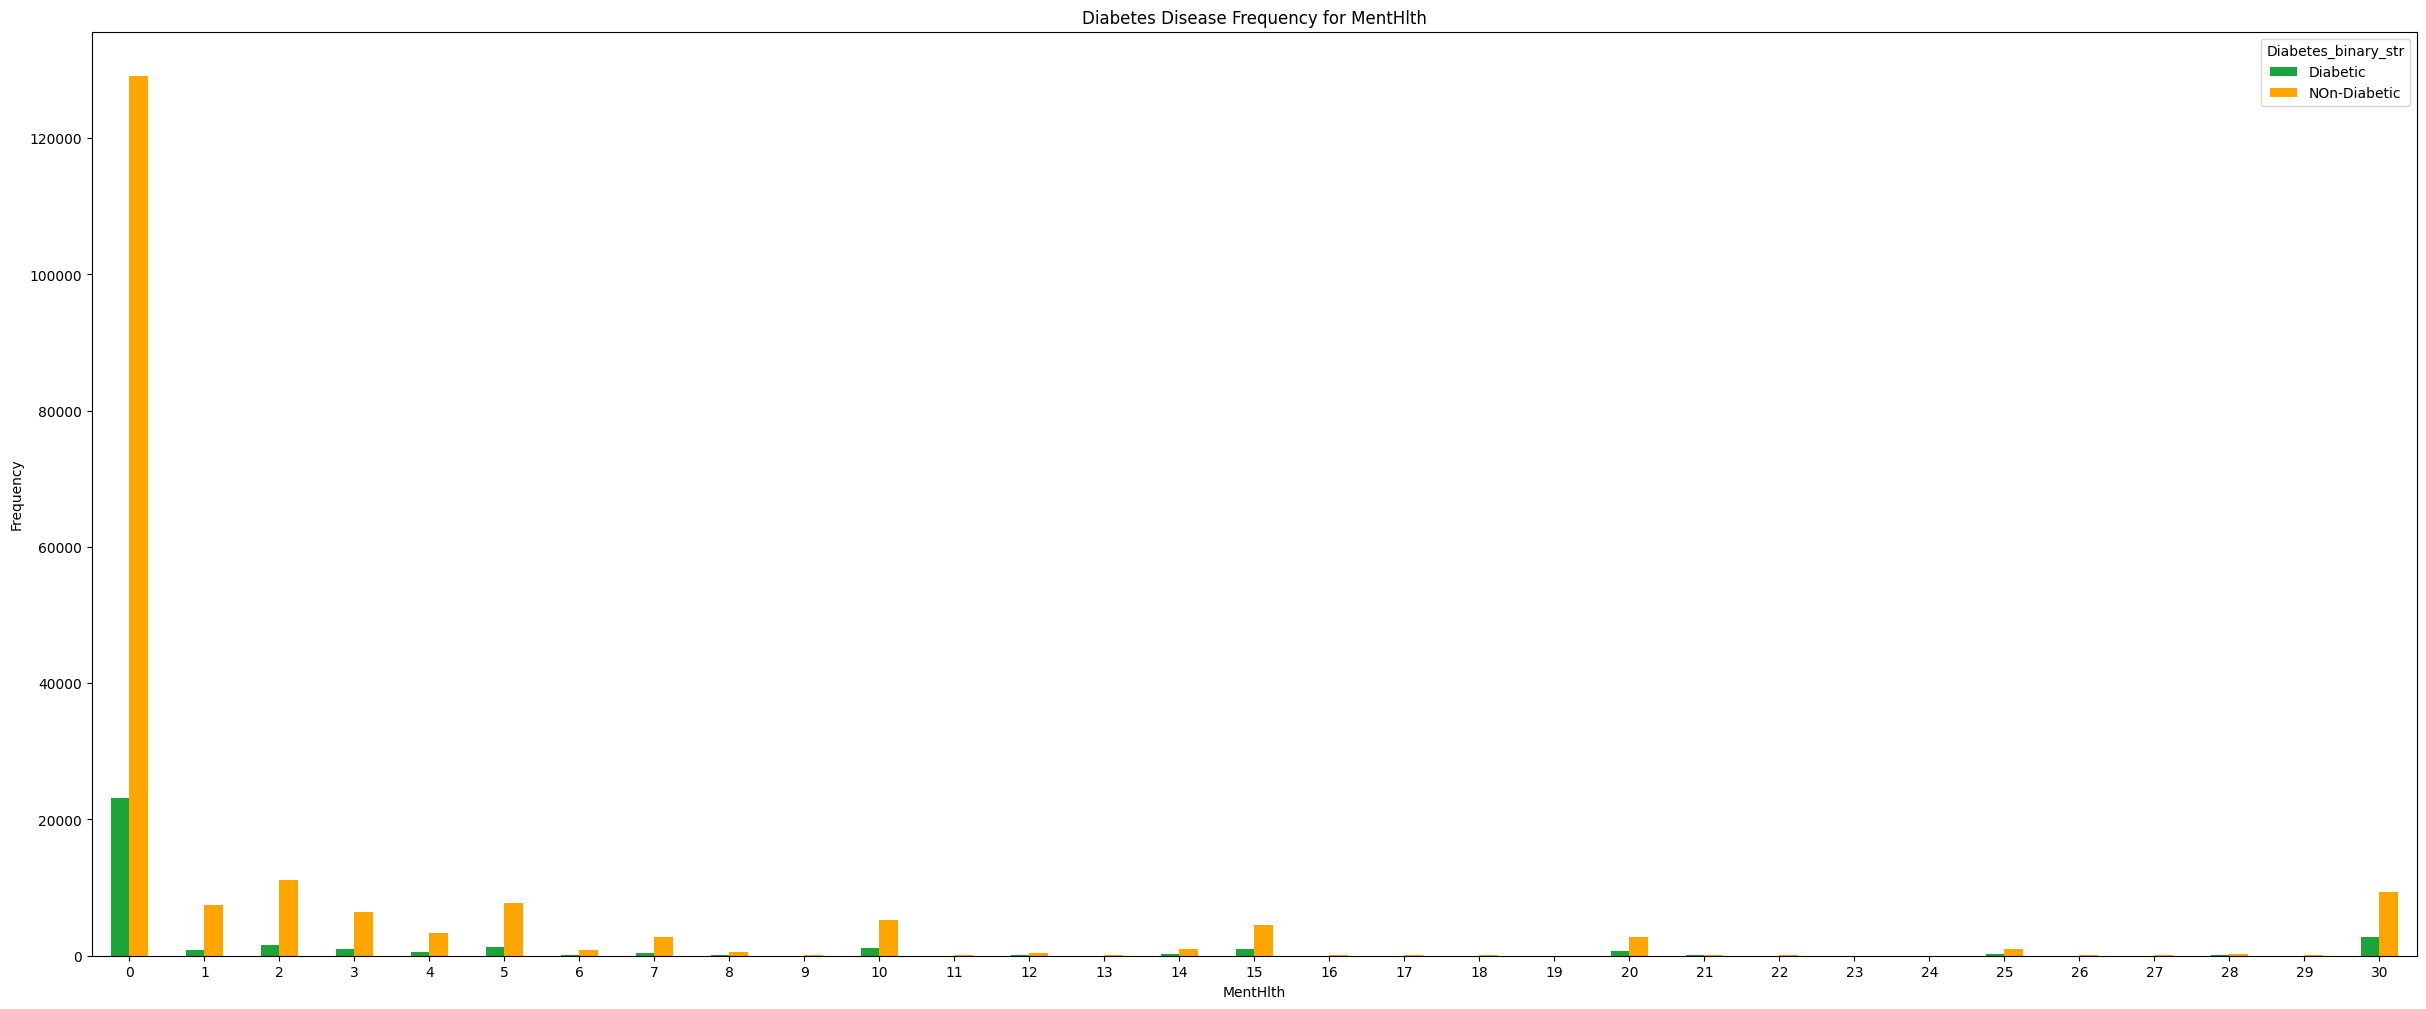

In [38]:
pd.crosstab(data.MentHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['#1CA53B', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that Menthlth Group 0-5 have impact on Diabetic

____________________________________________________________________________________________________________________

**The feature "PhysHlth" and it's relation with the target**

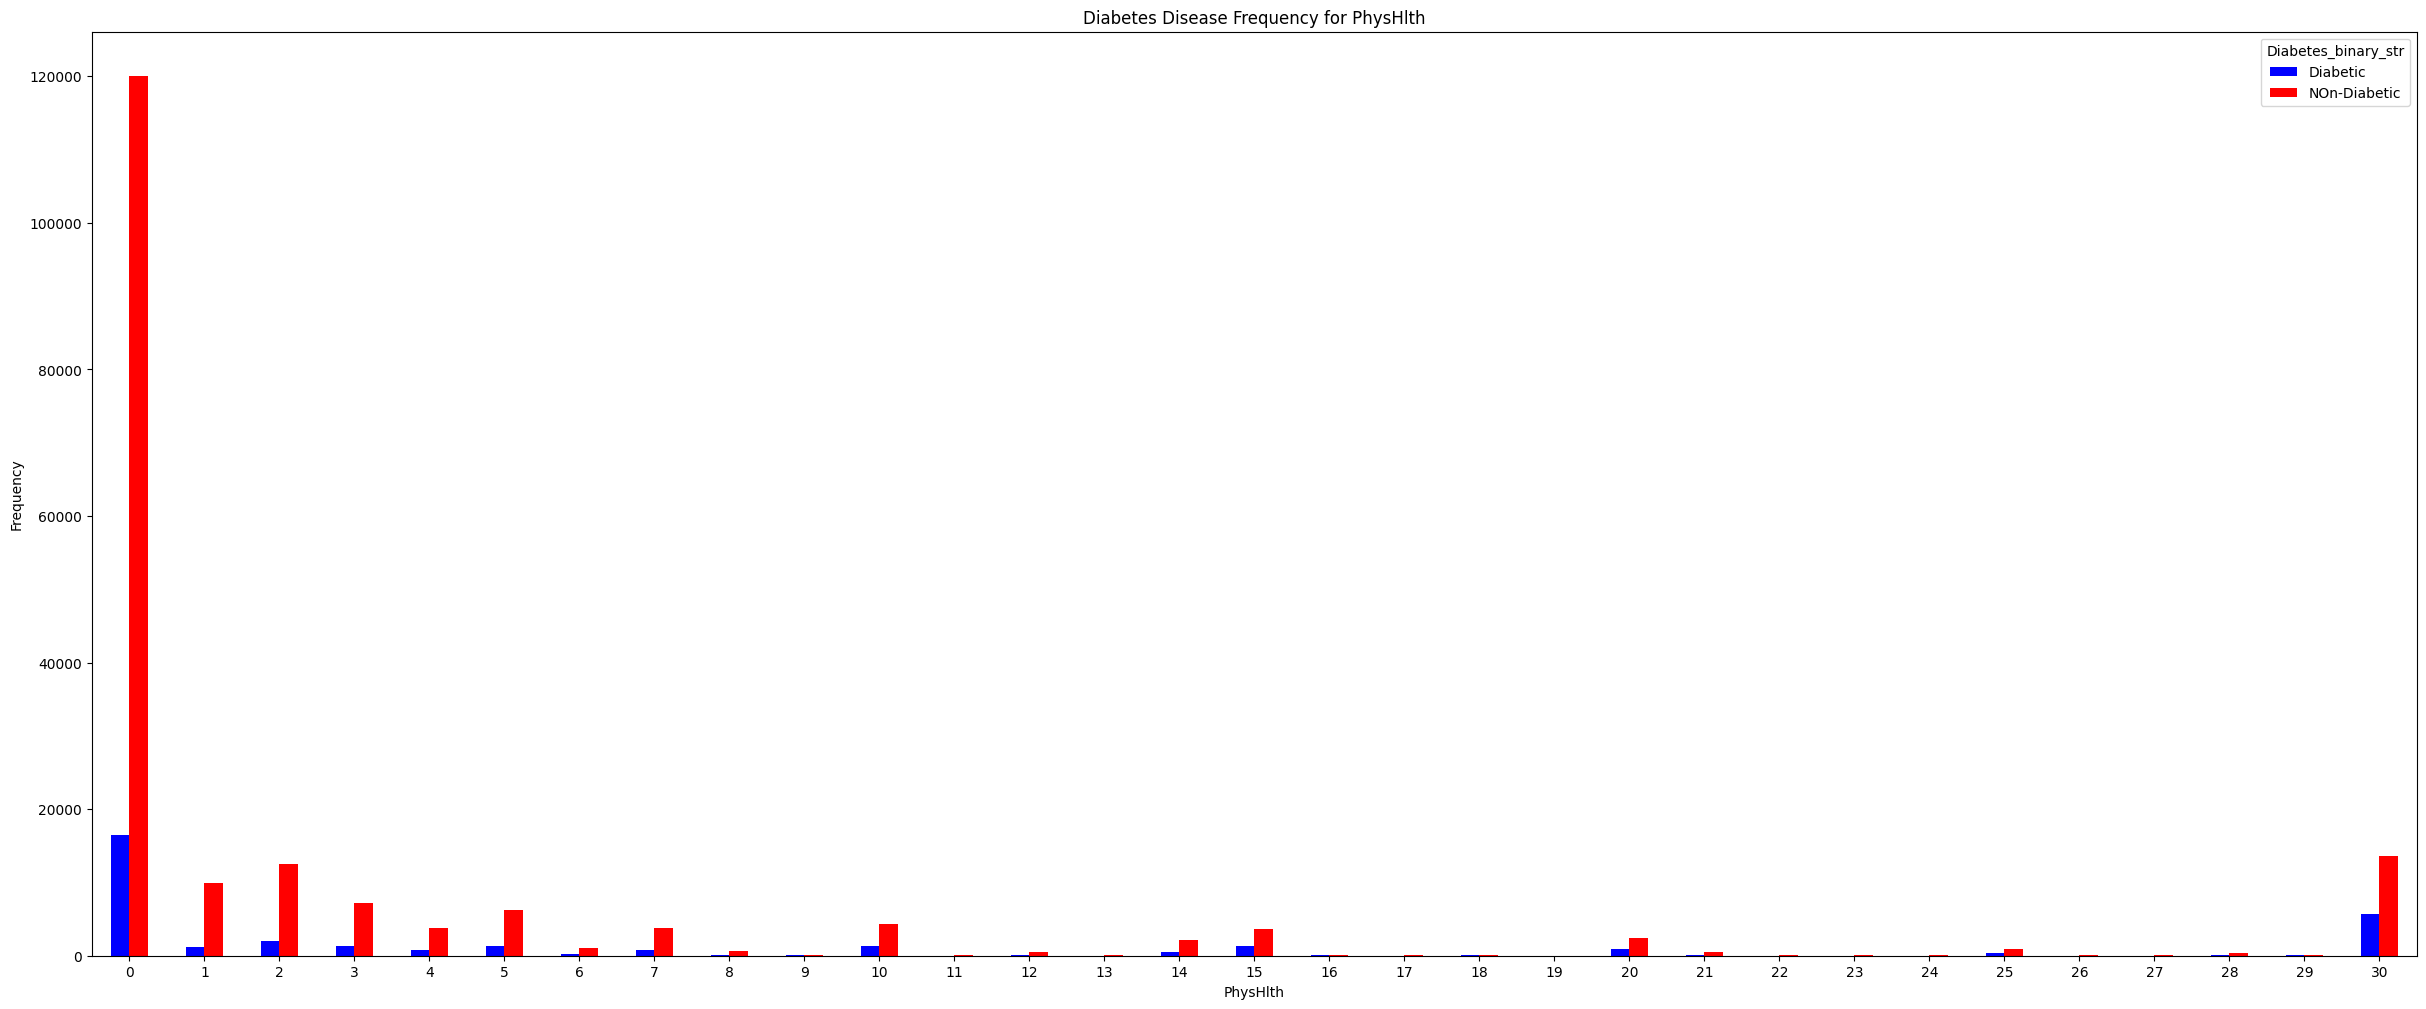

In [39]:
pd.crosstab(data.PhysHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that PhysHlth Group 0-5 have impact on Diabetic

______________________________________________________________________________________________________________________

**The feature "GenHlth" and it's relation with the target**

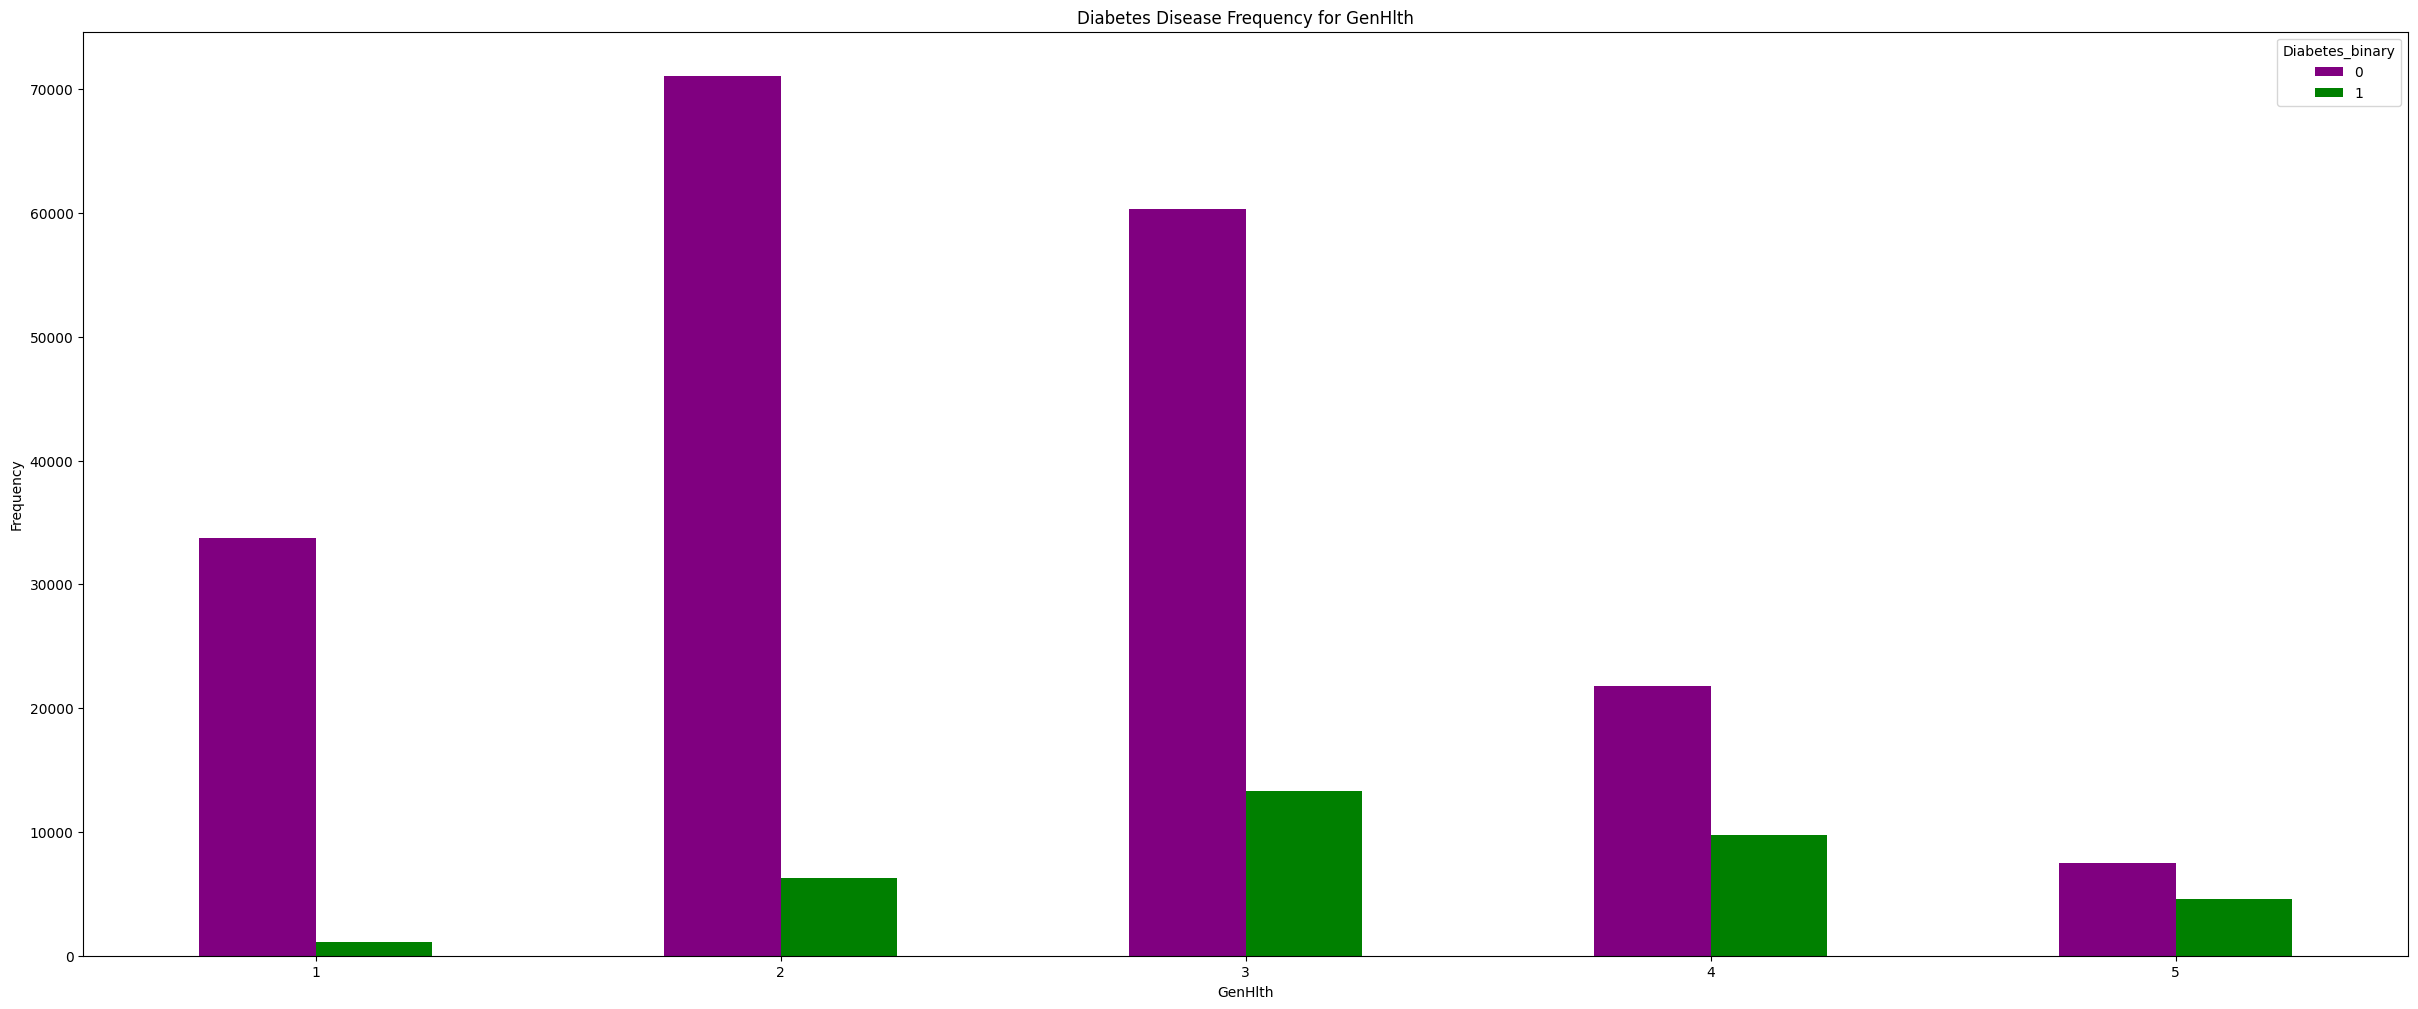

In [40]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.savefig('genhlth_diabetes.jpg',bbox_inches='tight')
plt.show()

not many peolpe have "5" and "4" of GenHlth  ,but they have diabetes !!!

_________________________________________________________________________________________________________________

# Feature Selections

__________________________________________________________________________________________________________________

**With correlation**

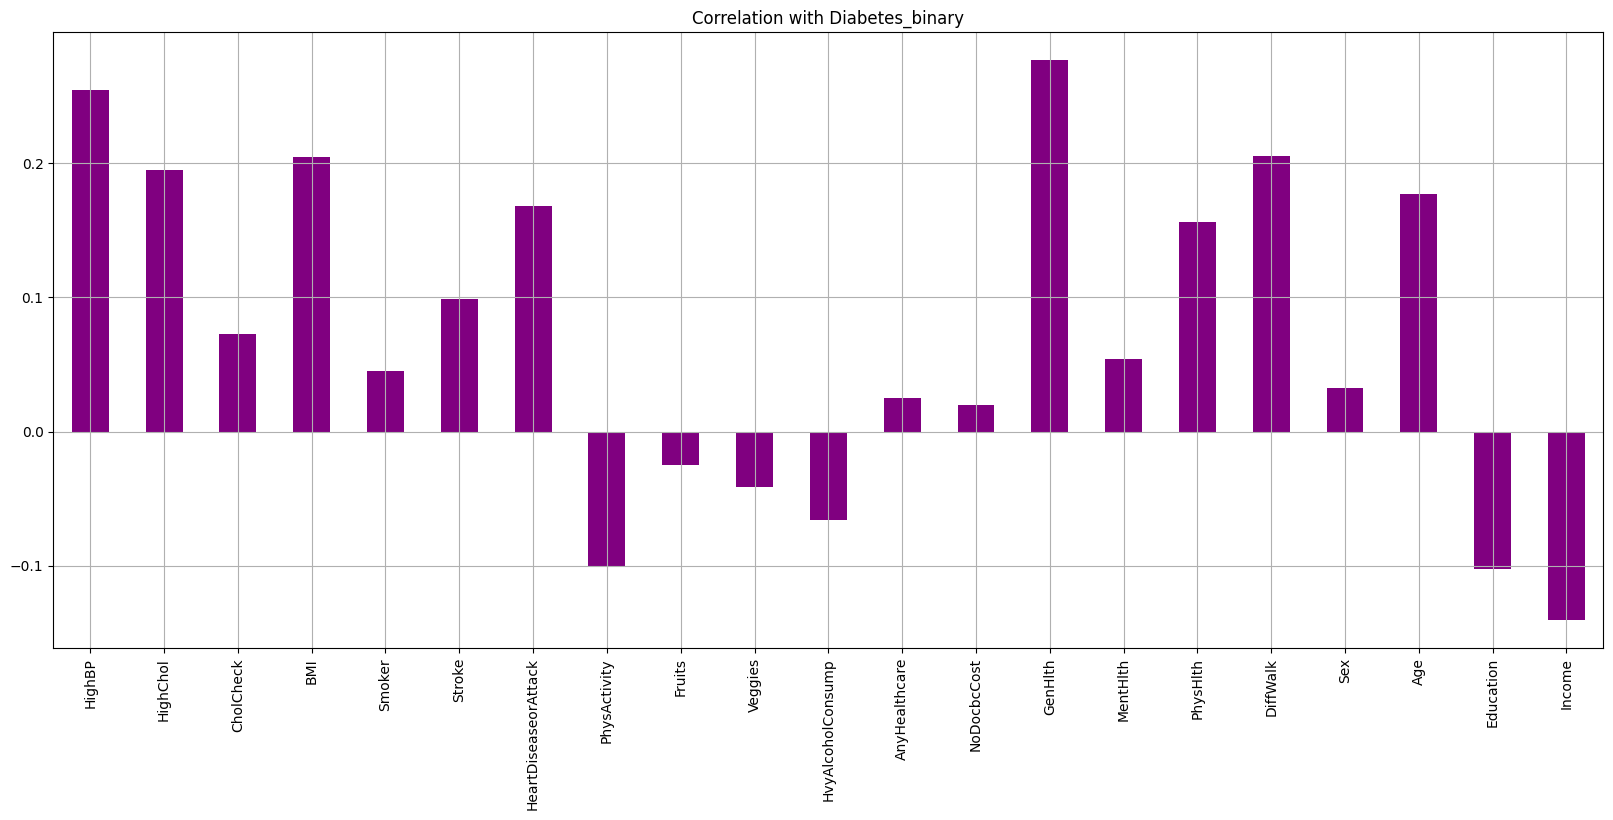

In [41]:
data.drop(['Diabetes_binary', 'Diabetes_binary_str'], axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary", color="Purple");
plt.savefig('corr_with_target.jpg',bbox_inches='tight')

**Diabetes_binary's relation with other columns Through bar Graph Result:**

1. Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

2. HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , MentHlth , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

_______________________________________________________________________________________________________________________________

**VIF Test**

In [42]:
def calc_VIF(x):
    """Calculate Variance Inflation Factor (VIF) for each variable."""
    x = add_constant(x)  # Ensure intercept is included
    vif_df = pd.DataFrame()
    vif_df["Variable"] = x.columns
    vif_df["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return vif_df.sort_values(by="VIF", ascending=False).reset_index()  # Optional: Sort by VIF

# Example Usage
X = Orginal_data.copy()  # Avoid modifying original data
vif_results = calc_VIF(X)
vif_results = vif_results[vif_results["Variable"] != "const"]  # Remove the constant row
vif_results



,index,Variable,VIF
1,15,GenHlth,1.821914
2,17,PhysHlth,1.623288
3,18,DiffWalk,1.536636
4,22,Income,1.505649
5,20,Age,1.354954
6,2,HighBP,1.344502
7,21,Education,1.326495
8,16,MentHlth,1.239497
9,1,Diabetes_binary,1.193120
10,3,HighChol,1.180932


___________________________________________________________________________________________________

**ANOVA Test**

In [43]:
X = Orginal_data.iloc[:,1:]
Y = Orginal_data.iloc[:,0]

In [44]:
# ANOVA feature selection for numeric input and categorical output


# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(253680, 10)


In [45]:
# Fit SelectKBest to the data
fs = SelectKBest(score_func=f_classif, k=10)
fit=fs.fit(X, Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores.nlargest(21,'Score')

,Feature,Score
13,GenHlth,23924.564885
0,HighBP,18870.365816
16,DiffWalk,12699.341579
3,BMI,12516.718642
1,HighChol,10600.350806
18,Age,8246.866284
6,HeartDiseaseorAttack,8231.555129
15,PhysHlth,7672.267690
20,Income,7004.370724
19,Education,3991.111142


In [46]:
pd.DataFrame(X_selected).head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,40.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,25.0,0.0,3.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0


________________________________________________________________________________________________________________

**Chi Square**

In [47]:
# # Standardize features (L1 regularization works better with scaled data)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Train L1-regularized logistic regression model
# model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)  # Adjust C for stronger/softer feature selection
# model.fit(X_scaled, Y)

# # Get absolute coefficients as feature importance scores
# feature_importance = np.abs(model.coef_[0])

# # Convert to DataFrame
# df_scores = pd.DataFrame(feature_importance, columns=["Score"])
# df_columns = pd.DataFrame(X.columns, columns=["Feature"])

# # Concatenate for better visualization
# f_Scores = pd.concat([df_columns, df_scores], axis=1)

# # Select the top 10 features
# top_features = f_Scores.nlargest(21, "Score")
# print(top_features)


In [48]:
# import sys
# sys.exit("Stopping execution here.")

In [49]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']
print(f_Scores.nlargest(21,'Score'))

                 Feature          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412
8                 Fruits     154.291404
9                Veggies     153.169215
17                   Sex     140.248274
2              CholCheck      39.716825
11         AnyHealthcare       3.280938


In [50]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412


In [51]:
#there are the features which we will use in our model

In [52]:
import sys
#sys.exit("Stopping execution here.")

We will use those features in our model

"Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare" will not be with us

In [53]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_binary_str"]

In [54]:
# Define the selected features
selected_features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack',
                     'HvyAlcoholConsump', 'GenHlth', 'Sex', 'Age', 'Income',"Diabetes_binary"]

# Retain only these columns in the dataset
data_selected = data[selected_features]

# Display the first few rows to verify
print(data_selected.head())


   HighBP  HighChol  CholCheck  BMI  HeartDiseaseorAttack  HvyAlcoholConsump  \
0       1         1          1   40                     0                  0   
1       0         0          0   25                     0                  0   
2       1         1          1   28                     0                  0   
3       1         0          1   27                     0                  0   
4       1         1          1   24                     0                  0   

   GenHlth  Sex  Age  Income  Diabetes_binary  
0        5    0    9       3                0  
1        3    0    7       1                0  
2        5    0    9       8                0  
3        2    0   11       6                0  
4        2    0   11       4                0  


In [55]:
data_selected=data.drop(colomns , axis= 1 ,inplace=False)
data_selected['Age'].unique()

array([ 9,  7, 11, 10,  8, 13,  4,  6,  2, 12,  5,  1,  3])

________________________________________________________________________________________________________________________

# Data Splitting

In [56]:
X=data_selected.drop(['Diabetes_binary'],axis=1)
y=data_selected["Diabetes_binary"]


In [111]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [112]:
print('X_train -> ',X_train.shape[0],'rows')
print('X_val ->',X_val.shape[0],'rows')
print('X_test -> ',X_test.shape[0],'rows')
print('y_train -> ',y_train.shape[0],'rows')
print('y_val -> ',y_val.shape[0],'rows')
print('y_test -> ',y_test.shape[0],'rows')

X_train ->  183579 rows
X_val -> 22948 rows
X_test ->  22947 rows
y_train ->  183579 rows
y_val ->  22948 rows
y_test ->  22947 rows


______________________________________________________________________________________________________

# Dealing with imbalancing

In [113]:
under = RandomUnderSampler(random_state=42)
X_train, y_train = under.fit_resample(X_train,y_train)
# smnote = SMOTE(random_state=42)
# X_train, y_train = smnote.fit_resample(X_train, y_train)

In [114]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

#smote



In [115]:
print('X_train -> ',X_train.shape[0],'rows')
print('X_test -> ',X_test.shape[0],'rows')
print('X_val -> ',X_val.shape[0],'rows')
print('y_train -> ',y_train.shape[0],'rows')
print('y_test -> ',y_test.shape[0],'rows')
print('y_val -> ',y_val.shape[0],'rows')

X_train ->  56030 rows
X_test ->  22947 rows
X_val ->  22948 rows
y_train ->  56030 rows
y_test ->  22947 rows
y_val ->  22948 rows


In [62]:
# y_train.value_counts()

In [63]:
# y_test.value_counts()

In [64]:
# from imblearn.under_sampling import NearMiss
# nm = NearMiss(version = 1 , n_neighbors = 5)

# x_sm,y_sm= nm.fit_resample(X_train,Y_train)

In [65]:
# Initialize SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42)

# # Apply oversampling
# x_sm, y_sm = smote.fit_resample(X_train, y_train)


In [66]:
# from imblearn.combine import SMOTETomek

# smote_tomek = SMOTETomek(random_state=42)
# x_sm, y_sm = smote_tomek.fit_resample(X_train, Y_train)



In [67]:
# y_sm.shape , x_sm.shape

In [68]:
# y_sm.value_counts()

In [69]:
# X_train,y_train=x_sm,y_sm

_______________________________________________________________________________________________________________________

# Data Scalling

In [70]:
# scaler = StandardScaler()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# #smote
# smote_tomek = SMOTETomek(random_state=42)
# X_sm, y_sm = smote_tomek.fit_resample(X_train, y_train)
# X_train, y_train = X_sm, y_sm

_________________________________________________________________________________________________________________

# Modeling

____________________________________________________________________________________________________

In [116]:
#k cross -> scale -> smote
from sklearn.model_selection import KFold

In [117]:
def cross_val_score(model, X, y, k = 5):
    kf = KFold(n_splits = k, shuffle = True, random_state = 42)
    num_fold = 1
    acc_arr = []
    for train_index, test_index in kf.split(X):
        # print(f'Fold:{num_fold}')
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        #scale
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        #smote
        under = RandomUnderSampler(random_state=42)
        X_sm, y_sm = under.fit_resample(X_train, y_train)
        X_train, y_train = X_sm, y_sm
        #train
        model.fit(X_train, y_train,X_test,y_test)
        #predict + acc
        accuracy = model.score(X_test, y_test)
        acc_arr.append(accuracy)
        print(f'Fold {num_fold},Accuracy: {accuracy:.4f}')
        num_fold += 1
    print(f'Average accuracy: {np.mean(acc_arr):.2f}')
    return acc_arr

**Logistic**

In [73]:
len(X_val)

45895

In [131]:
#
class LogisticRegression():
    def __init__(self, learning_rate=0.01, epochs=100, threshold=0.5, batch_size=32, method='mini_batch', momentum = 0.9, reg_method='l2', reg_strength=0.001,alpha = 0.5,optimal = False,patience = 5):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.threshold = threshold
        self.batch_size = batch_size
        self.method = method
        self.momentum = momentum
        self.reg_method = reg_method
        self.reg_strength = reg_strength
        self.alpha = alpha
        self.optimal = optimal
        self.patience = patience
        self.best_epoch = {}
        self.weights = None
        self.bias = None
        self.velocity_w = None
        self.velocity_b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def compute_grad(self, X, y, y_pred):
        m = X.shape[0]
        dw = np.dot(X.T, (y_pred - y))/m
        db = np.mean(y_pred - y)

        if self.reg_method == 'l1':
            dw += self.reg_strength * np.sign(self.weights)
        elif self.reg_method == 'l2':
            dw += self.reg_strength * self.weights
        elif self.reg_method == 'elasticnet': #alpha
            reg_term_l1 = self.alpha * self.reg_strength * np.sign(self.weights)
            reg_term_l2 = (1 - self.alpha) * self.reg_strength * self.weights
            dw += reg_term_l1 + reg_term_l2
        else:
            raise ValueError("Invalid regularization method. Choose from 'l1', 'l2', or 'elasticnet'.")

        return dw.flatten(), db

    def loss(self, X, y):
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        m = X.shape[0]
        loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))

        if self.reg_method == 'l1':
            loss += self.reg_strength * np.sum(np.abs(self.weights))
        elif self.reg_method == 'l2':
            loss += self.reg_strength * np.sum(self.weights ** 2) / 2
        elif self.reg_method == 'elasticnet':
            reg_term_l1 = self.alpha * self.reg_strength * np.sum(np.abs(self.weights))
            reg_term_l2 = (1 - self.alpha) * self.reg_strength * np.sum(self.weights ** 2) / 2
            loss += reg_term_l1 + reg_term_l2
        return loss

    def fit(self, X, y, X_val = None, y_val = None):
        y = np.array(y).flatten()
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.velocity_w = np.zeros(n)
        self.velocity_b = 0
        best_loss = float('inf')
        best_weights = None
        best_bias = None
        patience = 0
        if self.optimal == True:
            if self.method == 'sgd':
                self.epochs = 500
                self.learning_rate = 0.2
                self.momentum = 0.8
                self.reg_strength = 0.05
                self.patience = 15
            elif self.method == 'mini_batch':
                self.epochs = 500
                self.learning_rate = 0.2
                self.batch_size = 32
                self.reg_strength = 0.1
                self.patience = 12
            else:
                self.epochs = 500
                self.learning_rate = 0.35
                self.reg_strength = 0.05
                self.patience = 10
        for epoch in range(0,self.epochs+1):
            if self.method == 'batch':
                y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
                dw, db = self.compute_grad(X, y, y_pred)
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            elif self.method == 'mini_batch':
                indices = np.random.permutation(m)
                X_shuffled, y_shuffled = X[indices], y[indices]

                for i in range(0, m, self.batch_size):
                    x_batch = X_shuffled[i:i+self.batch_size]
                    y_batch = y_shuffled[i:i+self.batch_size]#.reshape(-1, 1) #cho dung shape
                    y_pred = self.sigmoid(np.dot(x_batch, self.weights) + self.bias)
                    dw, db = self.compute_grad(x_batch, y_batch, y_pred)
                    self.weights -= self.learning_rate * dw
                    self.bias -= self.learning_rate * db

            elif self.method == 'sgd':
                self.learning_rate = self.learning_rate / (1 + epoch * 0.001)
                indices = np.random.permutation(m)
                X_shuffled, y_shuffled = X[indices], y[indices]
                for i in range(m):
                    xi = X_shuffled[i]
                    yi = y_shuffled[i]
                    y_pred = self.sigmoid(np.dot(xi,self.weights) + self.bias)
                    dw = np.dot(xi.T,(y_pred - yi)) + self.reg_strength * self.weights
                    db = y_pred - yi
                    self.velocity_w = self.momentum * self.velocity_w + self.learning_rate * dw
                    self.velocity_b = self.momentum * self.velocity_b + self.learning_rate * db
                    self.weights -= self.velocity_w
                    self.bias -= self.velocity_b

            # print(f'Epoch : {epoch}, loss = {self.loss(X,y)}')
            # if epoch % 100 == 0:
            #     loss = self.loss(X, y)
            #     accuracy = self.score(X,y)
            #     print(f'Epoch {epoch}, Loss: {loss}\nAccuracy: {accuracy}\nWeights: {self.weights}\nBias: {self.bias}')

            if X_val is not None and y_val is not None:
                curr_loss = self.loss(X_val, y_val)
                curr_acc = self.score(X_val, y_val)
                if curr_loss < best_loss:
                    self.best_epoch = {'Epoch':epoch, 'Loss':curr_loss,'Accuracy': curr_acc}
                    best_loss = curr_loss
                    best_weights = self.weights.copy()
                    best_bias = self.bias
                    patience = 0
                    # print(f'Loss updated at epoch {epoch}: {best_loss:.4f}')
                else:
                  patience += 1
                  # print('Loss did not changed much.')
                  if patience == self.patience:
                    self.weights = best_weights
                    self.bias = best_bias
                    print(f'Loss converged at {epoch}')
                    break

    def predict_proba(self,X_test):
        return self.sigmoid(np.dot(X_test, self.weights) + self.bias)
    def predict(self, X_test):
        y_pred = self.sigmoid(np.dot(X_test, self.weights) + self.bias)
        return (y_pred > self.threshold).astype(int)
    def score(self, X_test,y_test):
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        return round(accuracy,2)
    def get_coef(self):
      return self.weights
    def get_intercept(self):
      return self.bias
    def get_best_epoch(self):
      return self.best_epoch
    def get_learning_rate(self):
      return self.learning_rate
    #sang mai viet not


In [132]:
lg = LogisticRegression(method ='mini_batch',optimal=True)

In [ ]:
# methods = ['sgd']
# for method in methods:
#     print(f'Method: {method}')
#     start = time.time()
#     lg  = LogisticRegression(method=method,optimal=True)
#     cross_val_score(lg, X, y, k = 5)
#     end = time.time()
#     print(f'Time for {method} : {(end - start):.2f}')
#     print('\n')

In [ ]:
# epochs = [100,500,1000]
# for epoch in epochs:
#   model = LogisticRegression(learning_rate = 0.3, epochs = epoch, method = 'mini_batch', batch_size = 32, reg_strength = 0.1,patience = 5)
#   model.fit(X_train,y_train,X_val,y_val)
#   loss = model.loss(X_test,y_test)
#   print(f'For {epoch} epochs, loss : {loss:.3f}')
#k tune epochs

In [133]:
lg.fit(X_train,y_train,X_val,y_val)

Loss converged at 16


In [134]:
print(lg.get_best_epoch())
print(lg.loss(X_test,y_test))

{'Epoch': 4, 'Loss': 0.5607990989056924, 'Accuracy': 0.73}
0.5651937620775013


In [135]:
lg.score(X_train, y_train)

0.73

In [136]:
lg.loss(X_test,y_test)

0.5651937620775013

In [137]:
lg.score(X_test, y_test)

0.72

In [ ]:
methods = ['mini_batch','sgd']
learning_rates = [0.01, 0.05, 0.1, 0.2,0.3]
reg_strengths = [0.005, 0.01, 0.05, 0.08, 0.1]
momentums = [0.5, 0.6, 0.7, 0.8, 0.9]
batch_sizes = [32, 64, 128]
epochs = [100,500,1000]
best_score = {f'{method}': 0 for method in methods}
best_params = {}
for method in methods:
  for lr in learning_rates:
    for reg in reg_strengths:
        if method == 'sgd':
          for momentum in momentums:
              model = LogisticRegression(method=method, learning_rate=lr, reg_strength=reg, momentum=momentum)
              model.fit(X_train, y_train,X_val,y_val)
              score = model.score(X_test, y_test)
              if score > best_score[method]:
                best_score[method] = score
                best_params[method] = {'method': method, 'learning_rate': lr, 'reg_strength': reg, 'momentum': momentum}
        elif method == 'mini_batch':
          for batch_size in batch_sizes:
              for epoch in epochs:
                  model = LogisticRegression(method=method, learning_rate=lr, reg_strength=reg, batch_size=batch_size)
                  model.fit(X_train, y_train,X_val,y_val)
                  score = model.score(X_test, y_test)
                  if score > best_score[method]:
                    best_score[method] = score
                    best_params[method] = {'method': method, 'learning_rate': lr, 'reg_strength': reg, 'batch_size': batch_size}
        elif method == 'batch':
          for epoch in epochs:
              model = LogisticRegression(epochs = epoch, method=method, learning_rate=lr, reg_strength=reg)
              model.fit(X_train, y_train,X_val,y_val)
              score = model.score(X_test, y_test)
              if score > best_score:
                best_score[method] = score
                best_params[method] = {'epochs': epoch,'method': method, 'learning_rate': lr, 'reg_strength': reg}
        else:
          pass


print(f"Best Score: {best_score}")
print(f"Best Parameters: {best_params}")

Best Score: {'mini_batch': 0.75, 'sgd': 0.77}
Best Parameters: {'mini_batch': {'method': 'mini_batch', 'learning_rate': 0.2, 'reg_strength': 0.1, 'batch_size': 32}, 'sgd': {'method': 'sgd', 'learning_rate': 0.05, 'reg_strength': 0.1, 'momentum': 0.8}}


,mini_batch,sgd
method,mini_batch,sgd
learning_rate,0.2,0.05
reg_strength,0.1,0.1
batch_size,32,NaN
momentum,NaN,0.8
Score,0.75,0.77


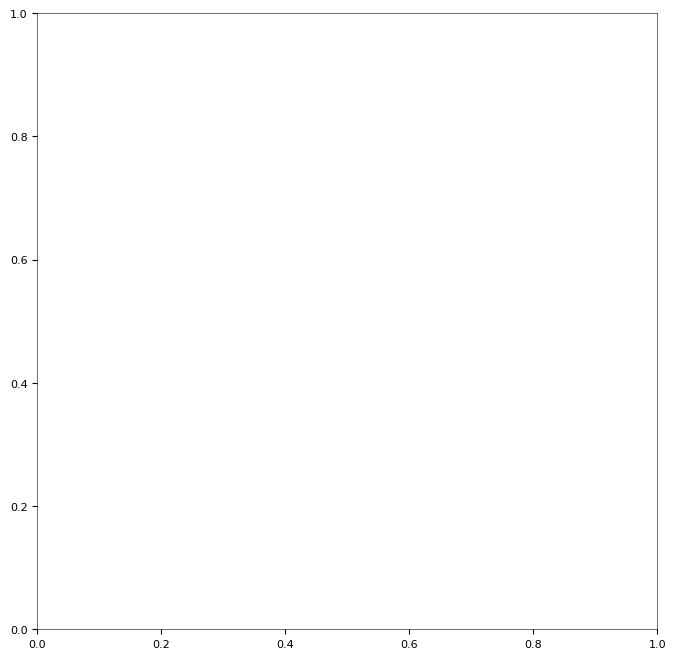

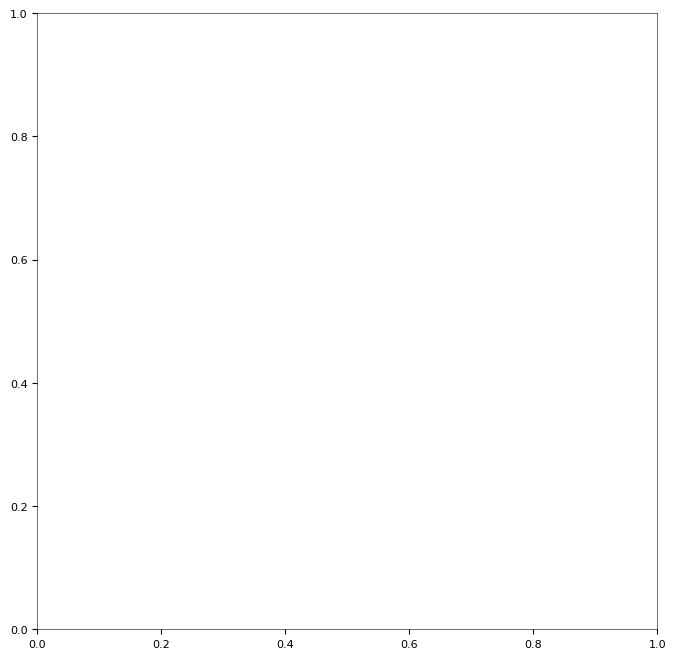

In [ ]:
hyper_tuning = pd.DataFrame(best_params)
hyper_tuning
score = pd.DataFrame(best_score,index = ['Score'])
pd.concat([hyper_tuning,score],axis = 0)

In [ ]:
y_scores_list = []
methods = ['batch','mini_batch','sgd']
for method in methods:
  model = LogisticRegression(method=method, optimal = True)
  model.fit(X_train, y_train,X_val,y_val)
  y_scores = model.predict_proba(X_test)
  print(f'Accuracy for {method}: {model.score(X_test,y_test)}\nLoss: {model.loss(X_test,y_test):.2f}')
  y_scores_list.append(y_scores)

Accuracy for batch: 0.72
Loss: 0.56
Loss converged at 5
Accuracy for mini_batch: 0.74
Loss: 0.56
Loss converged at 97
Accuracy for sgd: 0.78
Loss: 0.49


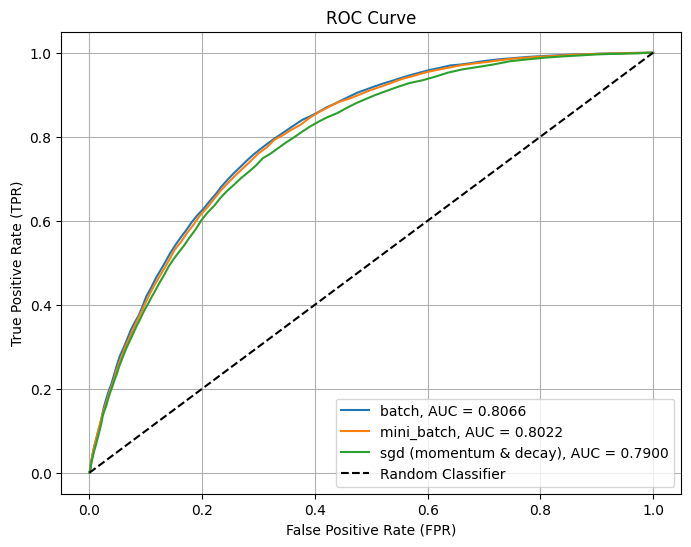

In [ ]:
def compute_roc_auc(y_true, y_scores_list, optimizer_names):
    plt.figure(figsize=(8, 6))  # Initialize ROC plot

    for y_scores, name in zip(y_scores_list, optimizer_names):
        thresholds = np.linspace(0, 1, 100)  # Generate thresholds
        tpr = []  # True Positive Rate
        fpr = []  # False Positive Rate

        for threshold in thresholds:
            y_pred = (y_scores >= threshold).astype(int)  # Apply threshold
            tp = np.sum((y_true == 1) & (y_pred == 1))
            fp = np.sum((y_true == 0) & (y_pred == 1))
            fn = np.sum((y_true == 1) & (y_pred == 0))
            tn = np.sum((y_true == 0) & (y_pred == 0))

            tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)  # Sensitivity
            fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)  # 1 - Specificity

        # Compute AUC
        auc = np.trapz(tpr, fpr)

        # Plot ROC Curve for this optimizer
        plt.plot(fpr, tpr, label=f'{name}, AUC = {abs(auc):.4f}')

    # Plot Random Classifier Baseline
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

    # Labeling and Formatting
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

compute_roc_auc(y_test, y_scores_list, ['batch', 'mini_batch', 'sgd (momentum & decay)'])


In [ ]:
for method in methods:
  model = LogisticRegression(method=method, optimal = True)
  model.fit(X_train, y_train,X_val,y_val)
  y_pred = model.predict(X_test)
  print(f'Classification report for {method}: ')
  print(classification_report(y_test,y_pred))
  mse = mean_squared_error(y_test, y_pred)
  print(f'Mean Squared Error of {method} : {mse:.2f}')
  rmse = math.sqrt(mean_squared_error(y_test, y_pred))
  print(f'Root Mean Squared Error of {method} : {rmse:.2f}')

Classification report for batch: 
              precision    recall  f1-score   support

           0       0.94      0.72      0.81     38714
           1       0.33      0.75      0.46      7181

    accuracy                           0.72     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.84      0.72      0.76     45895

Mean Squared Error of batch : 0.28
Root Mean Squared Error of batch : 0.53
Loss converged at 27
Classification report for mini_batch: 
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     38714
           1       0.35      0.64      0.45      7181

    accuracy                           0.76     45895
   macro avg       0.63      0.71      0.65     45895
weighted avg       0.83      0.76      0.78     45895

Mean Squared Error of mini_batch : 0.24
Root Mean Squared Error of mini_batch : 0.49
Classification report for sgd: 
              precision    recall  f1-score   support

     

In [110]:
# def thresh(model,X_test,threshold):
#   return (model.predict_proba(X_test) >= threshold).astype(int)
# y_pred = thresh(lg,X_test,0.5)

In [ ]:
methods2 = ['batch']
for method in methods:
  model = LogisticRegression(method=method, optimal = True)
  model.fit(X_train, y_train,X_val,y_val)
  y_pred = model.predict(X_test)
  # print(f'Classification report for {method}: ')
  # print(classification_report(y_test,y_pred))
  mse = mean_squared_error(y_test, y_pred)
  print(f'Mean Squared Error of {method} : {mse:.2f}')
  rmse = math.sqrt(mean_squared_error(y_test, y_pred))
  print(f'Root Mean Squared Error of {method} : {rmse:.2f}')

Mean Squared Error of batch : 0.28
Root Mean Squared Error of batch : 0.53
Mean Squared Error of mini_batch : 0.30
Root Mean Squared Error of mini_batch : 0.55
Mean Squared Error of sgd : 0.26
Root Mean Squared Error of sgd : 0.51


In [138]:
matrix = classification_report(y_test,lg.predict(X_test))
print(matrix)

              precision    recall  f1-score   support

           0       0.94      0.72      0.82     19459
           1       0.32      0.73      0.45      3488

    accuracy                           0.72     22947
   macro avg       0.63      0.73      0.63     22947
weighted avg       0.84      0.72      0.76     22947



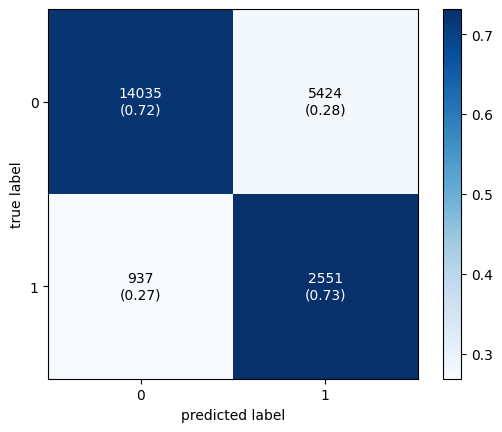

In [140]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,lg.predict(X_test))
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()